In [54]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import cv2

In [55]:
folder_list=os.listdir("C:/Signs_of_Aging/Wrinkles/datasets/train")

In [56]:
folder_list

['NoWrinkles', 'Wrinkled']

In [57]:
features_train=[]
target_train=[]
for folder in folder_list:
    ImgNames_list=os.listdir("C:/Signs_of_Aging/Wrinkles/datasets/train"+"/"+folder)
    print("In Folder : ",folder)
    for imgName in ImgNames_list:
        Imgarr=cv2.imread("C:/Signs_of_Aging/Wrinkles/datasets/train"+"/"+folder+"/"+imgName)
        # there might be images of size less than 100 by 100 and so error occurs
        try:
            Imgarr=cv2.resize(Imgarr,(100,100))
        except: # we need to write atleast one line of code
            pass
        else:
            features_train.append(Imgarr)
            if folder=="NoWrinkles":
                target_train.append(0)
            else:
                target_train.append(1)

In Folder :  NoWrinkles
In Folder :  Wrinkled


In [58]:
features_train=np.array(features_train)
target_train=np.array(target_train)

In [59]:
features_train.shape

(261, 100, 100, 3)

In [60]:
target_train.shape

(261,)

In [61]:
features_train.ndim

4

In [62]:
target_train.ndim

1

In [63]:
def preprocessing(image):
    image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    image=image/255
    return image

In [64]:
features_train=np.array(list(map(preprocessing,features_train)))

In [65]:
features_train.shape

(261, 100, 100)

In [66]:
features_train=features_train.reshape(261, 100, 100,1)

In [67]:
from keras.preprocessing.image import ImageDataGenerator

In [68]:
dataGen=ImageDataGenerator(rotation_range=10,width_shift_range=0.1,height_shift_range=0.1,zoom_range=0.2,shear_range=0.1)

In [69]:
dataGen.fit(features_train)

In [70]:
batches=dataGen.flow(features_train,target_train,batch_size=5)

In [71]:
len(batches)

53

In [72]:
images,labels=next(batches)

In [73]:
images.ndim

4

In [74]:
labels.shape

(5,)

In [75]:
images.shape

(5, 100, 100, 1)

In [76]:
import matplotlib.pyplot as plt

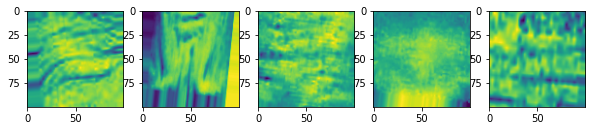

In [77]:
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(images[i].reshape(100,100))
plt.show()

In [78]:
features_train.shape

(261, 100, 100, 1)

In [79]:
target_train.shape

(261,)

In [80]:
from keras.utils.np_utils import to_categorical

In [81]:
target_train=to_categorical(target_train)

In [82]:
target_train.shape

(261, 2)

In [83]:
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout
from keras.models import Sequential

In [84]:
model=Sequential()
model.add(Conv2D(100,(3,3),activation="relu",input_shape=(100,100,1)))
model.add(Conv2D(100,(3,3),activation="relu"))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(50,(3,3),activation="relu"))
model.add(Conv2D(50,(3,3),activation="relu"))
model.add(Conv2D(50,(3,3),activation="relu"))
model.add(MaxPooling2D(2,2))

#model.add(Dropout(0.5)) # for overfitting model

model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax")) 

In [86]:
from tensorflow.keras.optimizers import Adam

In [87]:
model.compile(Adam(learning_rate=0.0001),loss="categorical_crossentropy",metrics=["accuracy"])

In [ ]:
model.fit(dataGen.flow(features_train,target_train,batch_size=5),epochs=50)

Epoch 1/50
53/53 [==============================] - 11s 192ms/step - loss: 0.6361 - accuracy: 0.7586
Epoch 2/50
53/53 [==============================] - 11s 208ms/step - loss: 0.6229 - accuracy: 0.7586
Epoch 3/50
53/53 [==============================] - 13s 236ms/step - loss: 0.5903 - accuracy: 0.7586
Epoch 4/50
53/53 [==============================] - 12s 232ms/step - loss: 0.5589 - accuracy: 0.7586
Epoch 5/50
53/53 [==============================] - 12s 228ms/step - loss: 0.5240 - accuracy: 0.7586
Epoch 6/50
53/53 [==============================] - 17s 326ms/step - loss: 0.5696 - accuracy: 0.7586
Epoch 7/50
53/53 [==============================] - 33s 617ms/step - loss: 0.5241 - accuracy: 0.7586
Epoch 8/50
53/53 [==============================] - 38s 710ms/step - loss: 0.5290 - accuracy: 0.7586
Epoch 9/50
53/53 [==============================] - 40s 758ms/step - loss: 0.5249 - accuracy: 0.7586
Epoch 10/50
53/53 [==============================] - 39s 741ms/step - loss: 0.5024 - accura

In [ ]:
model_json=model.to_json() # converted to json file
with open("Wrinkle.json","w") as abc:
    abc.write(model_json)
    abc.close()
model.save_weights("WrinkleWeights.h5") # saving weights as hdf 5 file
print("Save the Model")

In [ ]:
from keras.models import model_from_json
json_file=open("Wrinkle.json","r")
loaded_model_json=json_file.read()
json_file.close()
loaded_model=model_from_json(loaded_model_json)
loaded_model.load_weights("WrinkleWeights.h5")
print("Loaded model successfully")

In [ ]:
def getClassName(classNo):
    if classNo == 0: return "No Wrinkles"
    elif classNo == 1: return "Wrinkled"

In [ ]:
import cv2
image=cv2.imread('C:/Signs_of_Aging/Anthony_Fauci_2020.jpg')

In [ ]:
cv2.imshow("Fauci",image)
cv2.waitKey(5000)
cv2.destroyAllWindows()

In [ ]:
face_cascade=cv2.CascadeClassifier("C:/xml files/haar-cascade-files-master/haarcascade_frontalface_default.xml")

In [ ]:
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
faces=face_cascade.detectMultiScale(gray,1.05,15) # 5% reduction , iff the rectangle identifies the face 3 times
for (x,y,w,h) in faces: # x,y->coordinates of rectangles on faces, w-> width of rectangle, h->height of rectangle
    cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)
img=image[x:x+w,y:y+h]

In [ ]:
imagearr=cv2.resize(img,(100,100))
imagearr=preprocessing(imagearr)
imagearr=imagearr.reshape((1,100,100,1)) 
predictions=loaded_model.predict(imagearr)
classIndex=loaded_model.predict_classes(imagearr)
probValue=np.amax(predictions)
cv2.putText(image,"Class: ",(20,25),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255)) 
cv2.putText(image,"Probability: ",(20,65),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255))
if probValue>0.75:
    cv2.putText(image,getClassName(classIndex),(120,25),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),1)
    cv2.putText(image,str(int(probValue*100))+" %",(200,65),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),2)
cv2.imshow("Model Prediction",image)
key=cv2.waitKey(0)
if key==ord("\r"):
    cv2.destroyAllWindows()